
$Ejercicio 1:$ Resolver con Runge-Kutta orden 4 el sistema \begin{align} \dot x &= y-y^3\ \dot y &= -x -y^2 \end{align}
Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [5]:
function RK4(f,list,x0) #Definimos Runge-Kutta de orden 4.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK4 (generic function with 1 method)

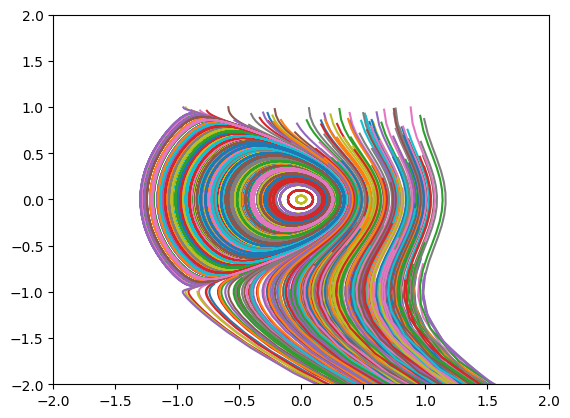

(-2,2)

In [16]:
lista = -12:0.1:12 #Se define una lista de t.
X = linspace(0,1,500)    
for i in X #Se realiza un for donde se grafica x para crear las condiciones iniciales.
        
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-2,2)
ylim(-2,2)

El jacobiano de F lo obtenemos con sus derivadas $$\vec F=\left(\begin{array}{cc} y - y^3 \\-x-y^2 \end{array} \right)$$ sacamos la derivadas parciales.
$J\vec F=\left(\begin{array}{cc} \frac{\partial }{\partial x}(y - y^3)  ; \frac{\partial}{\partial y}(y - y^3)  \\ \frac{\partial}{\partial x}(-x-y^2); \frac{\partial}{\partial y}(-x-y^2)  \end{array} \right)$ $=$ $\left(\begin{array}{cc} 0 ; 1-3y^2  \\ -1 ;-2y  \end{array} \right) $ Ahora si lo evaluamos en $\vec 0$.
$$J\vec F (\vec 0) = \left(\begin{array}{cc} 0 ; 1  \\ -1 ; 0  \end{array} \right) $$
Como $\Delta= \det J\vec F (\vec 0) = 1$, y  $\tau=\text{tr} J\vec F (\vec 0)= 0$. El punto $\vec 0$ es un punto centro.

$Ejercicio 2:$ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?

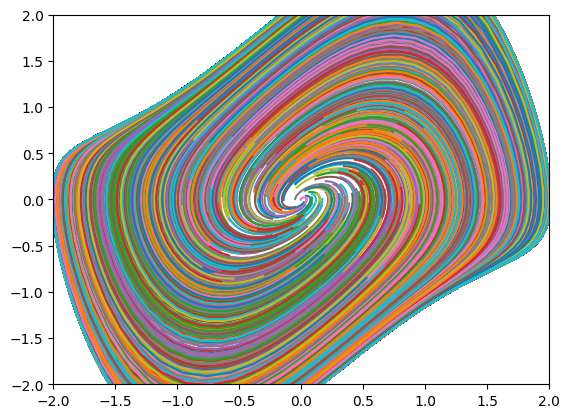

(-2,2)

In [23]:
g(x,t)=[x[2],-x[1]+x[2]*(1-x[1]^2)] #Definimos nuestra función.
listt2=-10:0.1:10 

for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(g,listt2,[x0,y0]))
    listy=map(x->x[2],RK4(g,listt2,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-2,2)
ylim(-2,2)

Podemos ver que el espacio es una serie de espirales que convergen a 0

Usen $\mu=0.5$.


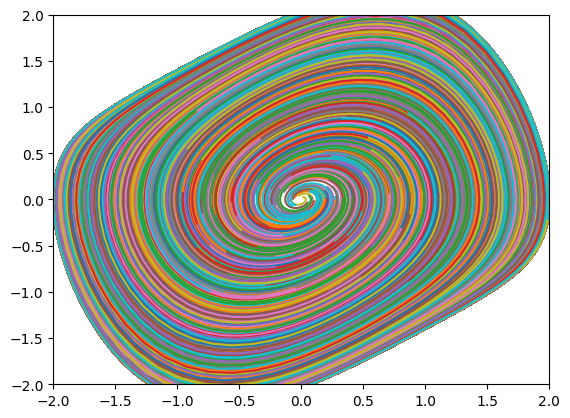

(-2,2)

In [25]:
h(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] #Definimos nuestra función con mu=0.5.
listt3=-10:0.1:10
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(h,listt3,[x0,y0]))
    listy=map(x->x[2],RK4(h,listt3,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-2,2)
ylim(-2,2)

Podemos notar que las espirales cambian, el espacio va tendiendo a ser un círculo.

Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

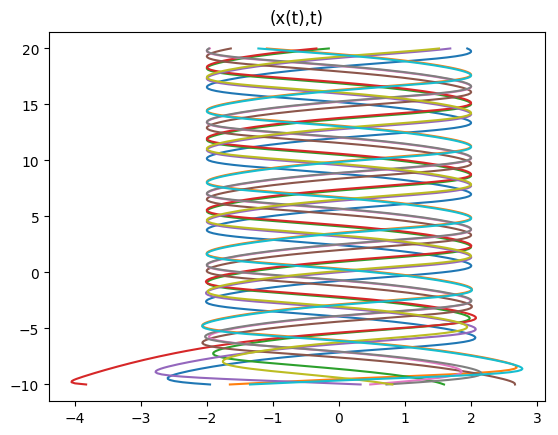

PyObject Text(0.5,1,u'(x(t),t)')

In [44]:
j(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] #Ahora graficamos el espacio x(t) contra t.
listt3=-10:0.1:20
for i in 1:10 #Reducimos las iteraciones para observar mejor lo que sucede.
    x0=4*(2*rand()-1)
    y0=4*(2*rand()-1)
    listx=map(x->x[1],RK4(j,listt3,[x0,y0]))
    listy=map(x->x[2],RK4(j,listt3,[x0,y0]))
    
    plot(listx,listt3) #Graficamos (x(t),t).
end
title("(x(t),t)")

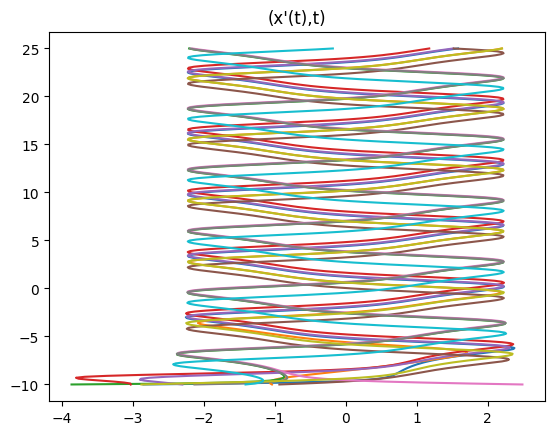

PyObject Text(0.5,1,u"(x'(t),t)")

In [36]:
k(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] #Ahora graficamos el espacio x'(t) contra t.
listt3=-10:0.1:25
for i in 1:10 #Reducimos las iteraciones para observar mejor lo que sucede.
    x0=4*(2*rand()-1)
    y0=4*(2*rand()-1)
    listx=map(x->x[1],RK4(k,listt3,[x0,y0]))
    listy=map(x->x[2],RK4(k,listt3,[x0,y0]))
    
    plot(listy,listt3) #Graficamos (x'(t),t).
end
title("(x'(t),t)")

$Ejercicio 4:$ Hacer lo mismo para el sistema \begin{align} \dot x&= x+y-x (x^2+y^2)\ \dot y &= y-x-y(x^2+y^2) \end{align} Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

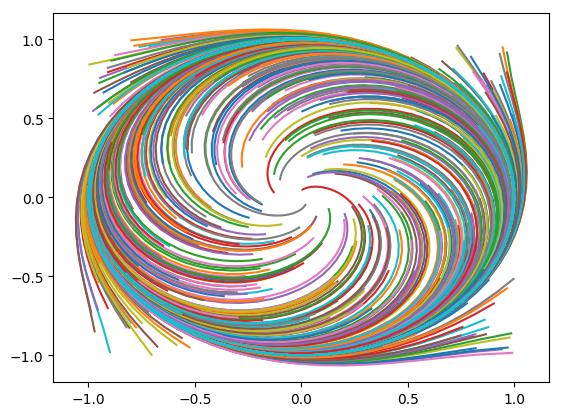

In [39]:
B(x,t)=[x[1]+x[2]-x[1]*((x[1])^2+(x[2])^2),x[2]-x[1]-x[2]*((x[1])^2+(x[2])^2)] #Definimos una nueva matriz.
listt=-30:0.1:30 #Damos un intervalo de tiempo.

for i in 1:500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx2=map(x->x[1],RK4(B,listt,[x0,y0]))
    listy2=map(x->x[2],RK4(B,listt,[x0,y0]))
    
    plot(listx2,listy2)
end

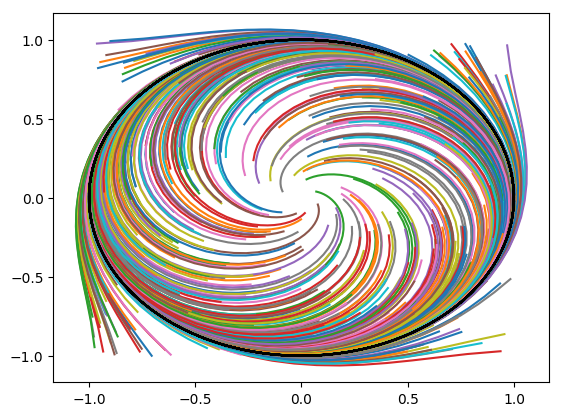

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fceb9140ad0>

In [43]:
C(x,t)=[x[1]+x[2]-x[1]*((x[1])^2+(x[2])^2),x[2]-x[1]-x[2]*((x[1])^2+(x[2])^2)] #Definimos nuestra matriz.
listt=-30:0.1:30 #Damos un intervalo de tiempo.

for i in 1:500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx2=map(x->x[1],RK4(C,listt,[x0,y0]))
    listy2=map(x->x[2],RK4(C,listt,[x0,y0]))
    
    plot(listx2,listy2)
end
plot(cos.(listt),sin.(listt),color="black") #Graficamos el ciclo límite.

Se observa que las soluciones de este sistema comienzan cerca del origen, se alejan y tienden al círculo unitario (circulo negro) las soluciones que comienzan fuera del círculo, tienden al círculo unitario. Por lo tanto el origen es un repulsor y el círculo unitario $x^{2}+y^{2}=1$ es un conjunto atractor.